In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/covid19_tweets.csv')

In [3]:
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.columns

Index([&#39;user_name&#39;, &#39;user_location&#39;, &#39;user_description&#39;, &#39;user_created&#39;,
       &#39;user_followers&#39;, &#39;user_friends&#39;, &#39;user_favourites&#39;, &#39;user_verified&#39;,
       &#39;date&#39;, &#39;text&#39;, &#39;hashtags&#39;, &#39;source&#39;, &#39;is_retweet&#39;],
      dtype=&#39;object&#39;)

In [5]:
df.text

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn&#39;t it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

## Distribuciones de variables

Identificar la distribución de las siguientes variables y presentar un gráfico.

1) Número de consonantes en el nombre de usuario.

2) Número de palabras en la descripción.

3) Año de apertura de la cuenta.

4) Número de seguidores hasta el percentil 75%.

5) Número de amigos hasta el percentil 75%.

6) Número de favoritos de usuario hasta el percentil 75%.

7) Día y mes de la publicación del Tweets.

8) Número de frases en el texto.


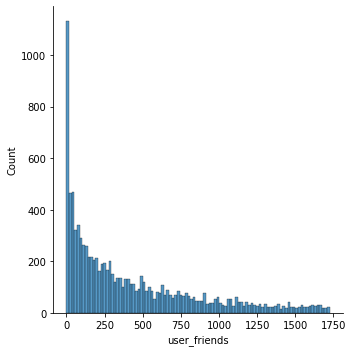

In [15]:
p = sns.displot(df[df['user_friends'] < 1725.25].head(10000), x = "user_friends", bins = 100)

In [7]:
df[['user_friends']].describe()

,user_friends
count,179108.000000
mean,2121.701566
std,9162.553072
min,0.000000
25%,148.000000
50%,542.000000
75%,1725.250000
max,497363.000000


## Correlación de variables

Presentar un gráfico de correlación de variables a partir de la lista usada en el ejercicio anterior.

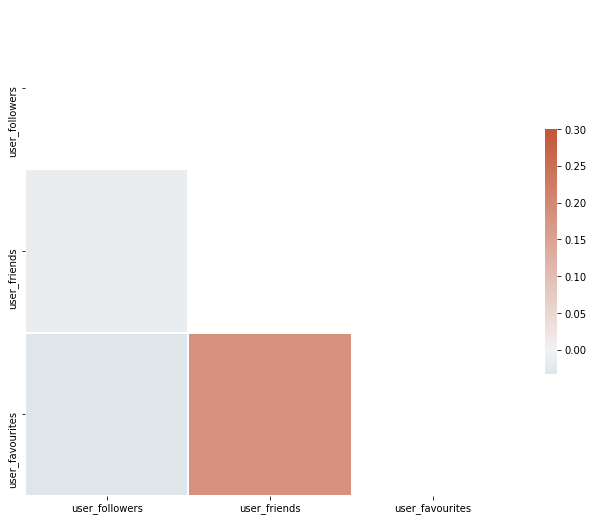

In [16]:
corr = df.head(10000)[['user_followers','user_friends','user_favourites']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
p = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Minería de texto

1) ¿Cuales son las 10 palabras más frecuentes en todo el corpus?

2) ¿Cual es el percentil 25% y 75% para la frecuencia de las palabras?

3) Porcentaje de palabras que pertenecen a las stopwords en inglés.

4) Tamaño de vocabulario.

5) Densidad y dispersión de la matriz de conteo vectorizada.

6) Porcentaje disminuido de vocabulario tras aplicar lemetización o stemming.

7) Conocimiento experto: proponer un subconjunto de 5 palabras del vocabulario orginal de importancia en el conjunto de datos.

In [21]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rojo1997/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[&#39;i&#39;, &#39;me&#39;, &#39;my&#39;, &#39;myself&#39;, &#39;we&#39;, &#39;our&#39;, &#39;ours&#39;, &#39;ourselves&#39;, &#39;you&#39;, &quot;you&#39;re&quot;, &quot;you&#39;ve&quot;, &quot;you&#39;ll&quot;, &quot;you&#39;d&quot;, &#39;your&#39;, &#39;yours&#39;, &#39;yourself&#39;, &#39;yourselves&#39;, &#39;he&#39;, &#39;him&#39;, &#39;his&#39;, &#39;himself&#39;, &#39;she&#39;, &quot;she&#39;s&quot;, &#39;her&#39;, &#39;hers&#39;, &#39;herself&#39;, &#39;it&#39;, &quot;it&#39;s&quot;, &#39;its&#39;, &#39;itself&#39;, &#39;they&#39;, &#39;them&#39;, &#39;their&#39;, &#39;theirs&#39;, &#39;themselves&#39;, &#39;what&#39;, &#39;which&#39;, &#39;who&#39;, &#39;whom&#39;, &#39;this&#39;, &#39;that&#39;, &quot;that&#39;ll&quot;, &#39;these&#39;, &#39;those&#39;, &#39;am&#39;, &#39;is&#39;, &#39;are&#39;, &#39;was&#39;, &#39;were&#39;, &#39;be&#39;, &

## Conclusiones estadísticas

1) ¿Los usuarios verificados usan palabras menos frecuentes que los usuarios no verificados?

2) ¿La mayor parte de los usuarios con más seguidores están localizados en Estados Unidos?

3) ¿Es mayor el porcentaje de gente que usa iPhone y esta verificada que la que usa Android y esta verificada?

4) Sabiendo que la persona es de Washington DC, ¿que probabilidad hay de que mencione a Donald Trump en un Tweet?

In [22]:
df['user_location'].value_counts()

India                          3741
United States                  2455
New Delhi, India               1721
Mumbai, India                  1401
Washington, DC                 1354
                               ... 
HI to CA to UT                    1
Yobe, Nigeria                     1
Philadelphia, Pa.                 1
wherever delicious food is!       1
Pune, MH, 🇮🇳                      1
Name: user_location, Length: 26920, dtype: int64

## Clusterización

Realizar una clusterización (kmeans) argumentando gráficamente el número de cluster sobre las siguientes 3 variables:

* user_followers

* user_friends

* user_favourites

## Clasificación

Usando las variables númericas descritas en el apartado de distribuciones entrenar un clasificador SGD contra la etiqueta usuario verificado usando las técnicas estadisticas:

* División train test 80 20

* Validación cruzada 5

In [24]:
from sklearn.linear_model import SGDClassifier

In [23]:
df['user_verified'].value_counts()

False    156013
True      23095
Name: user_verified, dtype: int64

## Estructuración y exportación

1) Crear una clase que herede de TransformerMixin en un nuevo fichero ubicado en CoviTweets/CoviTweets/preprocessing.py que dada la matriz de datos original genere un numpy.array que contenga la variables en orden descritas en el apartado de distribución.

2) Crear un pipeline que junte el preprocesamiento y la clasificación en un fichero ubicado en CoviTweets/CoviTweets/model.py.

3) Entrenar y exportar el pipeline al directorio CoviTweets/models/model.dill.

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from dill import dump